In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
predictions = np.squeeze(np.load('predictions.npy'), axis=-1).T
actual = np.squeeze(np.load('../kuramoto_sivashinsky/trajectories/trajectory_0.npy'), axis=-1).T[:, 20000+500:22000+500]
print(predictions.shape, actual.shape)

(64, 2000) (64, 2000)


Text(0.5, 0, 'Prediction time (Lyapunov times)')

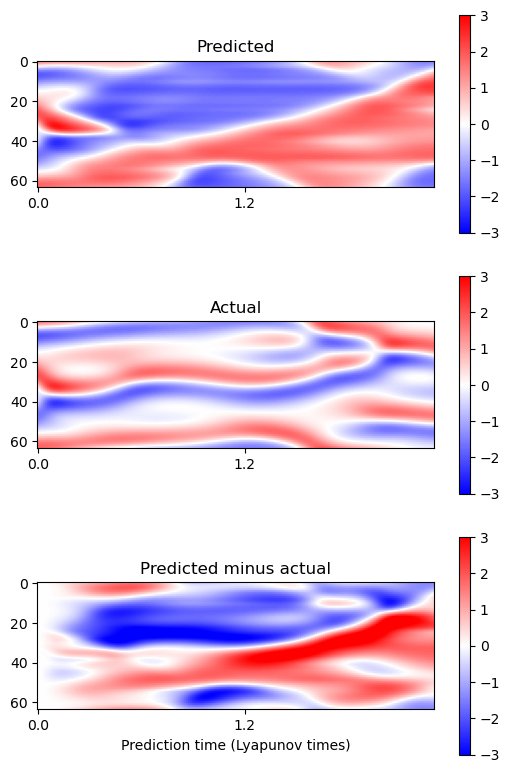

In [3]:
t_lyap = 20.83  # Wikner et al. 2022 (arxiv version), p. 20
t = np.arange(0, 0.25*2000, 0.25) / t_lyap

start = 0
num = 200

fig, axs = plt.subplots(3, 1, figsize=(6.4, 9.6))

cax0 = axs[0].imshow(predictions[:, start:start+num], cmap='bwr', vmin=-3, vmax=3)
cax1 = axs[1].imshow(actual[:, start:start+num], cmap='bwr', vmin=-3, vmax=3)
cax2 = axs[2].imshow(predictions[:, start:start+num] - actual[:, start:start+num], cmap='bwr', vmin=-3, vmax=3)

for i in range(3):
    ax = axs[i]
    pixels_per_tick = 104
    tick_positions = np.arange(0, len(t[start:start+num]), pixels_per_tick)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(np.around(t[start:start+num][tick_positions], decimals=1))
    fig.colorbar(cax0, ax=ax)
    ax.set_aspect(1)


axs[0].set_title('Predicted')
axs[1].set_title('Actual')
axs[2].set_title('Predicted minus actual')

axs[2].set_xlabel('Prediction time (Lyapunov times)')

# plt.tight_layout()


Text(0.5, 1.0, 'Actual trajectory before time 0, predicted after time 0')

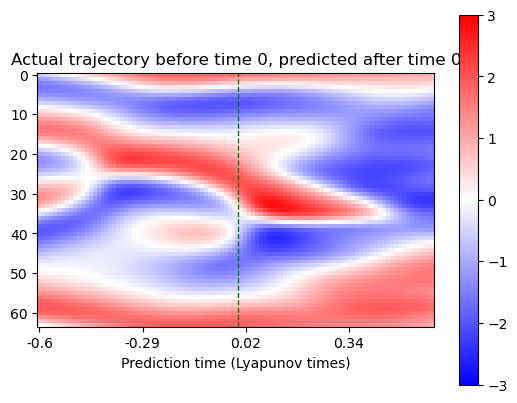

In [4]:
actual_immediately_preceding = np.squeeze(np.load('../kuramoto_sivashinsky/trajectories/trajectory_0.npy'), axis=-1).T[:, 19950+500:20000+500]

t_lyap = 20.83  # Wikner et al. 2022 (arxiv version), p. 20
t = np.arange(-0.25*50, 0.25*50, 0.25) / t_lyap

fig, ax = plt.subplots()

for_plot = np.hstack([actual_immediately_preceding, predictions[:, :50]])

cax = ax.imshow(for_plot, cmap='bwr', vmin=-3, vmax=3)

pixels_per_tick = 26
tick_positions = np.arange(0, len(t), pixels_per_tick)
ax.set_xticks(tick_positions)
ax.set_xticklabels(np.around(t[tick_positions], decimals=2))
fig.colorbar(cax0, ax=ax)
ax.set_aspect(1)

ax.axvline(x=for_plot.shape[1]/2, color='green', linestyle='--', linewidth=1)

ax.set_xlabel('Prediction time (Lyapunov times)')

plt.title('Actual trajectory before time 0, predicted after time 0')